# Práctica 3: Regresión Lineal I - Aprendizaje Automático I

Dentro de los modelos predictivos regresivos, quizás uno de los más básicos sea la regresión lineal. Este modelo se basa en considerar que el valor de la variable dependiente a predecir ($y$) se puede obtener como una combinación lineal $f(\mathbf{x})$ de los atributos o características ($\mathbf{x}=(x_1, x_2, \dots, x_n)$).

$y=f(\mathbf{x}) = w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 + \dots + w_n \cdot x^n = w_0 + \mathbf{w}^T \cdot \mathbf{x}$

Por tanto, dado un conjunto de $m$ muestras $(x_i^1, x_i^2, \dots, x_i^n, y_i)$ el objetivo es encontrar el conjunto de pesos $w_0, w_1, \dots, w_n$ que minimice una función de pérdida $J_w$ que depende de los valores reales ($y_i$) y los estimados ($\hat{y}_i=w_0 + \mathbf{w}^T \cdot \mathbf{x_i}$) por (\ref{eq:regresion_lineal}). Una función de pérdida muy utilizada en los modelos de regresión lineal es el error cuadrático medio, cuya expresión es la siguiente: 

$J_w = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i - y_i)^2$

La minimización de la función de pérdida se puede realizar por diferentes métodos cuyo estudio queda fuera del objetivo de esta práctica y para lo que se remite al estudiante a la bibliografía de la asignatura.

La librería sklearn proporciona el módulo linear_model que incluye la clase LinearRegression que como otros estimadores de sklearn, implementa las funciones fit y predict. La función $\texttt{fit}$ acepta como argumentos un array bidimensional con el valor de las variables independientes  y un array que se corresponde con la variable dependiente. Después de ejecutar la función fit, se habrán calculado los pesos de la ecuación. Indicar que la clase posee el argumento booleano fit_intercept que indica si se normaliza las muestras restando la media. Por defecto, fit_intercept=True que implica centrar las muestras restando la media y por tanto $w_0 \neq 0$ y se puede acceder por medio del atributo intercept_ de la clase . Si se asigna fit_intercept=False, no se centran las muestras y por tanto el valor de $w_0=0$. Los pesos $w_1, \dots, w_n$ se almacenan en el atributo coef_ de la clase. La función predict realiza el proceso de predicción de los valores de la variable dependiente a partir de un conjunto de datos de entrada expresados como un array bidimensional.

## Descripción del conjunto de datos

El conjunto de datos a utilizar se corresponde con el tiempo de paso en minutos de corredores por 3 puntos de control y el tiempo final en meta. Los campos están separados por ; y no por ,

In [2]:
import pandas as pd

In [4]:
datos = pd.read_csv('data/tiempos-small.csv', sep=';')
datos.head()

,P1,P2,P3,Meta
0,385,514,636,703
1,408,556,674,738
2,419,580,728,803
3,425,579,729,800
4,453,619,766,863


Mostramos la información y se observa que no hay valores perdidos y son todos númericos

In [ ]:
datos.info() # Muestra información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P1      268 non-null    int64
 1   P2      268 non-null    int64
 2   P3      268 non-null    int64
 3   Meta    268 non-null    int64
dtypes: int64(4)
memory usage: 8.5 KB


In [ ]:
datos.describe() # Muestra estadísticas descriptivas

,P1,P2,P3,Meta
count,268.000000,268.000000,268.000000,268.000000
mean,451.731343,626.656716,787.544776,869.570896
std,81.162496,121.362095,158.361395,176.471254
min,274.000000,362.000000,447.000000,491.000000
25%,395.000000,545.000000,683.000000,754.000000
50%,445.000000,616.000000,773.000000,849.000000
75%,507.000000,707.250000,884.750000,974.000000
max,703.000000,1001.000000,1278.000000,1398.000000


## Ajuste por regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Separamos los datos en características, *X*, y variable respuesta, *y*

In [8]:
X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

In [12]:
regr = LinearRegression()

In [13]:
regr.fit(X,y)

LinearRegression()

Mostramos los coeficientes de la regresión.

In [14]:
regr.coef_

array([ 0.05070608, -0.50931134,  1.47297266])

**Ejercicio para clase:**

Buscar en matplotlib como hacer un diagrama de barras y mostrar los tres coeficientes como un diagrama de barras con las etiquetas del eje x con el nombre del coeficiente.

Preguntar que implica el valor de cada coeficiente.

Posible solución:

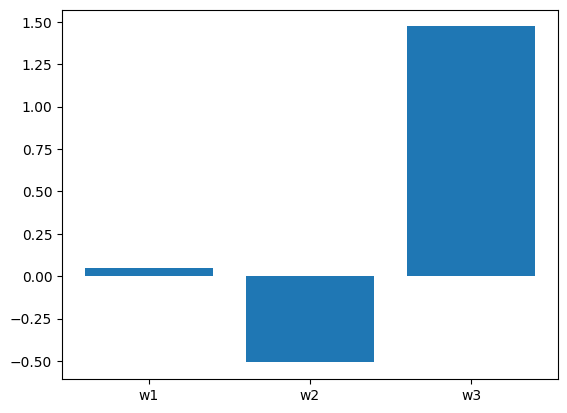

In [15]:
x = range(3)
plt.bar(x, regr.coef_)
plt.xticks(x,['w1', 'w2', 'w3'])
plt.show()

## Diagramas de dispersión

Un tipo de diagramas muy útil para representar información puntual son los diagramas de dispersión (scatter). Matplotlib permite hacerlos mediante la función scatter. Se puede cambiar el marcador y el color pero es diferente a como se hace con plot. 

- El color se cambia mediante el argumento "c"
- El marcador se cambia mediante el argumento "marker"

En ambos casos los valores que pueden tomar son iguales a los usados con la función para mostrar curvas.

In [16]:
x1 = np.random.randint(10, size=20)
x2 = np.random.randint(10, size=20)
print(f'coordenadas x1: {x1}')
print(f'coordenadas x2: {x2}')

coordenadas x1: [5 9 1 2 7 7 3 4 9 1 0 0 7 8 3 8 6 4 8 5]
coordenadas x2: [8 1 5 0 3 5 0 7 0 7 0 6 7 4 5 3 1 2 2 2]


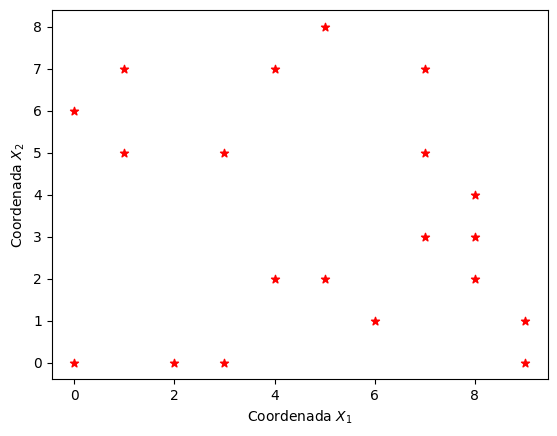

In [17]:
plt.scatter(x1, x2, c='r', marker='*')
plt.xlabel('Coordenada $X_1$')
plt.ylabel('Coordenada $X_2$')
plt.show()

**Ejercicio para clase:**

Dibujar mediante scatter cada una de las columnas P1 a P3 con la salida para comprobar que P3 tiene una mayor relación lineal con el tiempo en meta tal y como han tenido que detectar al ser w3 el valor mayor.

Usar el subplot que se vio en la primera clase

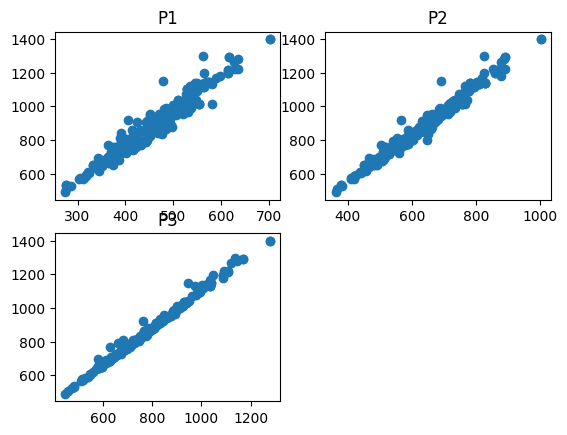

In [18]:
plt.subplot(2,2,1)
plt.scatter(X[:,0], y)
plt.title('P1')
plt.subplot(2,2,2)
plt.scatter(X[:,1], y)
plt.title('P2')
plt.subplot(2,2,3)
plt.scatter(X[:,2], y)
plt.title('P3')
plt.show()

Probar a realizar el ajuste con intercept_fit a True y a False y comprobar el resultado de los coeficientes y de intercept_

In [19]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)
print(f'w0: {regr.intercept_}')

w0: 5.796813956606911


In [20]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X,y)
print(f'w0: {regr.intercept_}')

w0: 0.0


## Estimación mediante regresión lineal

Dividir el conjunto de datos en train y test (p. e. 70/30)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6789)

In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Para comprobar la bondad del modelo de regresión una medida es el la raiz cuadrada del error cuadrático medio RMSE. 

Sklearn posee la función root_mean_squared_error.

### REVISAR SI LA VERSIÓN DE SKLEARN DEL LABORATORIO INCLUYE LA FUNCIÓN ROOT_MEAN_SQUARED_ERROR

In [24]:
from sklearn.metrics import mean_squared_error

In [26]:
error = mean_squared_error(y_test, y_pred)
print(f'Error: {error:.1f}')

Error: 208.8


Ejercicio de clase:

Obtener la regresión con una única variable de los tres P1, P2 y P3 y calcular el RMSE con cada una de ellas. Comprobar los resultados anteriores de valores de coeficientes y de gráficas de dispersión.

IMPORTANTE: Los modelos esperan encontrar como conjunto de entrenamiento un array bidimensional por lo que si solo se usa una sola variable para predecir se debe convertir un vector unidimensional en una matriz con una sola columna. Se puede hacer con vector.reshape(-1,1). Dar ejemplo en clase.

In [27]:
v = np.random.random(10)
print(f'Dimensiones de v {v.shape}')

# convertir en una matriz de una columna
m = v.reshape(-1,1)
print(f'dimensiones de v: {m.shape}')

Dimensiones de v (10,)
dimensiones de v: (10, 1)


Posible solución:

In [28]:
for col in range(3):
    X_train1 = X_train[:,col].reshape(-1,1)
    X_test1 = X_test[:,col].reshape(-1,1)

    regr = LinearRegression()
    regr.fit(X_train1, y_train)
    y_pred = regr.predict(X_test1)
    rmse = mean_squared_error(y_test, y_pred)
    print(f'RMSE variable {col+1}: {rmse:.1f}')

RMSE variable 1: 2659.2
RMSE variable 2: 1337.9
RMSE variable 3: 289.8
